In [14]:
#dependencies - added as we found we needed
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import gmaps

#just do one month to see data format
baseurl = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"
janurl = "&starttime=2019-01-01&endtime=2019-01-31"
url=baseurl+janurl   
response = requests.get(url).json()
#un-comment response to see all data output as json
#response

In [6]:
#Created a dictionary of all months
#We were limited by the amount of data we could do in one request so we found pulling by month worked well
    #July had a large earthquake swarm in CA,USA which caused us to exceed our limit so we had to split that month in half
monthurl = {
    'janurl':"&starttime=2019-01-01&endtime=2019-01-31", 
    'feburl':"&starttime=2019-02-01&endtime=2019-02-28", 
    'marurl':"&starttime=2019-03-01&endtime=2019-03-31",
    'aprurl':"&starttime=2019-04-01&endtime=2019-04-30",
    'mayurl':"&starttime=2019-05-01&endtime=2019-05-31",
    'junurl':"&starttime=2019-06-01&endtime=2019-06-30",
    'julurl':"&starttime=2019-07-01&endtime=2019-07-13",
    'julurl2':"&starttime=2019-07-14&endtime=2019-07-31",
    'augurl':"&starttime=2019-08-01&endtime=2019-08-31",
    'sepurl':"&starttime=2019-09-01&endtime=2019-09-30",
    'octurl':"&starttime=2019-10-01&endtime=2019-10-31",
    'novurl':"&starttime=2019-11-01&endtime=2019-11-30",
    'decurl':"&starttime=2019-12-01&endtime=2019-12-31"}

baseurl = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson"

#create lists to hold all the variables we want
name=[]
felt=[]
mag=[]
depth=[]
latitude=[]
longitude=[]
alert=[]
sig=[]
types=[]

#loop through all months & each earthquake to get all the data we want - append into the above lists
for urls in monthurl.items():
    url=baseurl+urls[1]
    print(f'Fetching {url}')
    response = requests.get(url)
    response_json=response.json()
    feature_list=response_json['features']
    
    for each_feature in feature_list: 
        try: 
            name.append(each_feature['properties']['title'])
            felt.append(each_feature['properties']['felt'])
            latitude.append(each_feature['geometry']['coordinates'][1])
            longitude.append(each_feature['geometry']['coordinates'][0])
            depth.append(each_feature['geometry']['coordinates'][2])
            mag.append(each_feature['properties']['mag'])
            alert.append(each_feature['properties']['alert'])
            sig.append(each_feature['properties']['sig'])
            types.append(each_feature['properties']['type'])
        except: 
            pass

Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-01-01&endtime=2019-01-31
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-02-01&endtime=2019-02-28
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-03-01&endtime=2019-03-31
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-04-01&endtime=2019-04-30
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-05-01&endtime=2019-05-31
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-06-01&endtime=2019-06-30
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-07-01&endtime=2019-07-13
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-07-14&endtime=2019-07-31
Fetching https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2019-08-01&en

In [7]:
#create dictionary to make DF
quake_dict={
    "Name":name,
    "Latitude":latitude,
    "Longitude":longitude,
    "Depth":depth,
    "Felt":felt,
    "Magnitude":mag,
    "Alert":alert,
    "Significance":sig,
    "Type":types}

#convert to DF
quakes_df=pd.DataFrame(quake_dict)

#print data to csv
quakes_df.to_csv("Raw_Quake_Data_2019.csv")
quakes_df.head()

,Name,Latitude,Longitude,Depth,Felt,Magnitude,Alert,Significance,Type
0,"M 1.5 - 56km WNW of Talkeetna, Alaska",62.433300,-151.176800,80.4,NaN,1.50,None,35,earthquake
1,"M 2.1 - 54km SE of Punta Cana, Dominican Republic",18.235000,-68.037300,8.0,NaN,2.09,None,67,earthquake
2,"M 1.4 Quarry Blast - 7km ENE of Three Forks, M...",45.919833,-111.459333,-2.0,NaN,1.38,None,29,quarry blast
3,"M 0.8 - 36km SW of North Nenana, Alaska",64.376300,-149.718200,15.0,NaN,0.80,None,10,earthquake
4,"M -0.4 - 46km ESE of Beatty, Nevada",36.693800,-116.316300,9.8,NaN,-0.40,None,0,earthquake


In [8]:
#It appears there are multiple event types other than just earthquakes
events=quakes_df["Type"].value_counts()
events

#ice quake = very cold air temperatures (negatives F) can penetrate the ground and start to rapidly freeze the goundwater
    #expands/cracks the grounds and creates booming sounds and ice quakes
#rock burst = spontaneous violent failure of rock that can occur in high-stress mines
#sonic booms = usually military tests from aircrafts

earthquake            171402
ice quake               1681
quarry blast            1053
explosion                863
mining explosion         213
other event              149
chemical explosion         3
sonic boom                 2
mine collapse              2
rock burst                 1
Name: Type, dtype: int64

In [10]:
#filter data so we only have earthquake type events
filtered_quakesdf = quakes_df.loc[quakes_df["Type"]=="earthquake"]

#print filtered df to csv
#use this one for analysis
filtered_quakesdf.to_csv("Quake_Data_2019.csv")
filtered_quakesdf.head()

,Name,Latitude,Longitude,Depth,Felt,Magnitude,Alert,Significance,Type
0,"M 1.5 - 56km WNW of Talkeetna, Alaska",62.4333,-151.1768,80.4,NaN,1.50,None,35,earthquake
1,"M 2.1 - 54km SE of Punta Cana, Dominican Republic",18.2350,-68.0373,8.0,NaN,2.09,None,67,earthquake
3,"M 0.8 - 36km SW of North Nenana, Alaska",64.3763,-149.7182,15.0,NaN,0.80,None,10,earthquake
4,"M -0.4 - 46km ESE of Beatty, Nevada",36.6938,-116.3163,9.8,NaN,-0.40,None,0,earthquake
5,"M 2.2 - 28km SSW of Tanaga Volcano, Alaska",51.6360,-178.2355,17.6,NaN,2.20,None,74,earthquake


### Quick Stats

In [11]:
#quick overview of data count and some basic stat info
filtered_quakesdf.describe()

,Latitude,Longitude,Depth,Felt,Magnitude,Significance
count,171402.000000,171402.000000,171402.000000,7832.000000,171371.000000,171402.000000
mean,40.244129,-114.298246,20.293559,58.384321,1.526511,56.196415
std,18.388822,60.650594,50.150667,1120.589150,1.138283,87.869446
min,-65.607100,-179.997500,-10.000000,0.000000,-1.690000,0.000000
25%,35.645000,-148.920700,3.400000,1.000000,0.830000,11.000000
50%,36.739050,-117.865083,7.290000,2.000000,1.280000,25.000000
75%,55.182708,-117.382000,13.300000,6.000000,1.900000,56.000000
max,86.600900,179.998200,667.390000,68916.000000,8.000000,2061.000000


## Question: Where are the biggest earthquakes occurring (& would you be able to feel them)?

In [5]:
#measuring where are the biggest earthquake occurring (where would you be able to feel them)
#Decided to go with Northern and Southern Hemispheres of the world because it would be more logical to plot a range as opposed to a specific location since there would be so many datapoints 
#per wikipedia.org, search query "Richter magnitude scale," (https://en.wikipedia.org/wiki/Richter_magnitude_scale) an earthquake could be felt at magnitude above 2.0 however will use 2.5 since that is more likely to be felt

#Creating Northern and Southern Hemispheres DataFrame
northern_hemi=filtered_quakesdf.loc[(filtered_quakesdf["Latitude"]>=0)]
southern_hemi=filtered_quakesdf.loc[(filtered_quakesdf["Latitude"]<0)]

#linking the Northern and Southern Hemispheres with Magnitude over 2.5
magnitude_north=northern_hemi.loc[(northern_hemi["Magnitude"]>=2.5)]
magnitude_south=southern_hemi.loc[(southern_hemi["Magnitude"]>=2.5)]

###### Creating Scatterplot for the Northern Hemisphere

The r-squared value is 0.10566880617657062


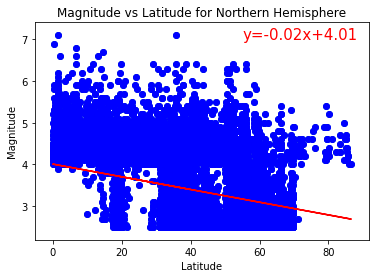

In [6]:
#plotting the data
x_value=magnitude_north["Latitude"]
y_value=magnitude_north["Magnitude"]
plt.scatter(x_value,y_value)
plt.title("Magnitude vs Latitude for Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")

#getting the linear regression data
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_value,y_value)
regress_value=x_value*slope+intercept
line_eq="y="+str(round(slope,2))+ "x+" +str(round(intercept,2))
plt.scatter(x_value, y_value, marker="o", color="blue")
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (55,7), fontsize="15", color="red")
print(f"The r-squared value is {rvalue**2}")
plt.savefig("Northern_latitude_vs_magnitude_linreg.png")

plt.show()

###### Creating Scatterplot for Southern Hemisphere

The r-squared value is 0.006559880715560423


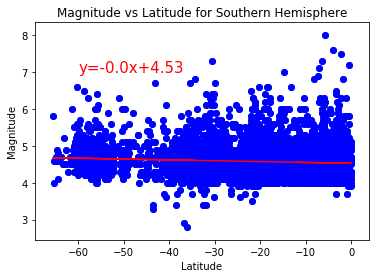

In [7]:
#plotting the data
x_value=magnitude_south["Latitude"]
y_value=magnitude_south["Magnitude"]
plt.scatter(x_value,y_value)
plt.title("Magnitude vs Latitude for Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Magnitude")

#getting the linear regression data
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_value,y_value)
regress_value=x_value*slope+intercept
line_eq="y="+str(round(slope,2))+ "x+" +str(round(intercept,2))
plt.scatter(x_value, y_value, marker="o", color="blue")
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (-60,7), fontsize="15", color="red")
print(f"The r-squared value is {rvalue**2}")
plt.savefig("Southern_latitude_vs_magnitude_linreg.png")

plt.show()

## Question: Does earthquake depth have a correlation to strength?

The correlation coefficient is 0.37.
The r-squared value is 0.1396.
The equation of the regression line is y = 0.01x + 1.42.


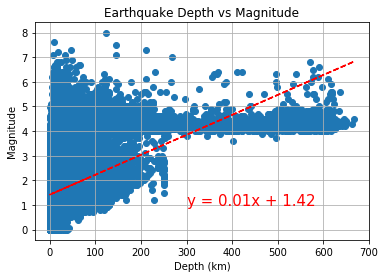

In [25]:
#started by plotting depth vs mag
#had to drop some NaN values and filter to only include positive numbers

filterdf=filtered_quakesdf.dropna(subset=["Magnitude", "Depth"])
filterdf=filterdf.loc[(filterdf["Magnitude"]>=0) & (filterdf["Depth"]>=0)]

x_values = filterdf["Depth"]
y_values = filterdf["Magnitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

cod =round(rvalue**2, 4)
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)

plt.scatter(x_values, y_values)
plt.grid(which="both")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (300,1), fontsize=15, color ='r')
plt.title("Earthquake Depth vs Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.savefig("Images/earthquakedepvsmag.png")

print(f'The correlation coefficient is {corr_coeff}.')
print(f'The r-squared value is {cod}.')
print(f'The equation of the regression line is {line_eq}.')

Both the correlation coefficient and the r-squared value suggest there is not much of a relation ship between these two variables. It can be noted that the deepest earthquakes seem to have a magnitude between 4-7. Shallow depths (0-200km) seem to be able to produce any magnitude of earthquake. 

The correlation coefficient is 0.37.
The r-squared value is 0.1367.
The equation of the regression line is y = 0.65x + 43.05.


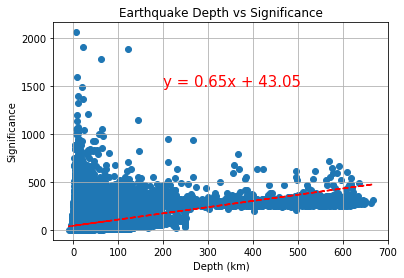

In [30]:
#This let me to ask since shallow depth can produce any magnitude quake is there a correlation between depth and significance?

x_values = filtered_quakesdf["Depth"]
y_values = filtered_quakesdf["Significance"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

cod =round(rvalue**2, 4)
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)

plt.scatter(x_values, y_values)
plt.grid(which="both")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (200,1500), fontsize=15, color ='r')
plt.title("Earthquake Depth vs Significance")
plt.xlabel("Depth (km)")
plt.ylabel("Significance")

plt.savefig("Images/earthquakedepvssig.png")

print(f'The correlation coefficient is {corr_coeff}.')
print(f'The r-squared value is {cod}.')
print(f'The equation of the regression line is {line_eq}.')

This correlation coefficient and r-squared value are very similar to the chart above suggesting there is likely not much of a correlation. However, I would note that the lower depth earthquakes (< 200km deep) do have the highest significance values (likely related to magnitude).

The correlation coefficient is 0.94.
The r-squared value is 0.8908.
The equation of the regression line is y = 75.72x + -62.04.


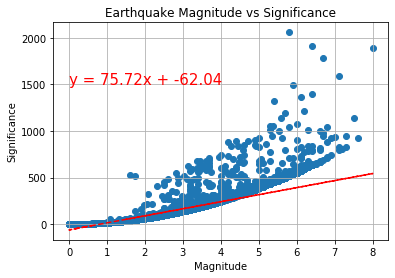

In [31]:
#This then led me to plot significance vs magnitude to see if there is a correlation

filterdf=filtered_quakesdf.dropna(subset=["Magnitude", "Significance"])
filterdf=filterdf.loc[(filterdf["Magnitude"]>=0)]

x_values = filterdf["Magnitude"]
y_values = filterdf["Significance"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

cod =round(rvalue**2, 4)
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)

plt.scatter(x_values, y_values)
plt.grid(which="both")
plt.plot(x_values, regress_values, "r--")
plt.annotate(line_eq, (0,1500), fontsize=15, color ='r')
plt.title("Earthquake Magnitude vs Significance")
plt.xlabel("Magnitude")
plt.ylabel("Significance")

plt.savefig("Images/earthquakemagvssig.png")

print(f'The correlation coefficient is {corr_coeff}.')
print(f'The r-squared value is {cod}.')
print(f'The equation of the regression line is {line_eq}.')

The correlation coefficient and r-squared value are both high for this graph suggesting there is a positive correlation. From looking at the graph itself, I would suggest the correlation is non linear, becoming increasingly more significant as magnitude increases. This makes sense as the Richter Scale (magnitude) increases exponentially. See Richter Scale image in slideshow or Images folder.

The correlation coefficient is 0.94.
The r-squared value is 0.8918.
The equation of the regression line is y = 75.92x + -62.28.


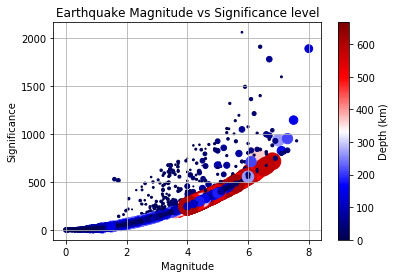

In [33]:
#I decided to add a depth component to this plot to compare all 3 variables at once

filterdf=filtered_quakesdf.dropna(subset=["Magnitude", "Significance", "Depth"])
filterdf=filterdf.loc[(filterdf["Magnitude"]>=0) & (filterdf["Depth"]>=0)]

x_values = filterdf["Magnitude"]
y_values = filterdf["Significance"]
z_values = filterdf["Depth"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

cod =round(rvalue**2, 4)
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)

plt.scatter(x_values, y_values, s=z_values/2, c=z_values, cmap=plt.get_cmap('seismic'))
plt.grid(which="both")
plt.title("Earthquake Magnitude vs Significance level")
plt.xlabel("Magnitude")
plt.ylabel("Significance")
cb=plt.colorbar()
cb.set_label("Depth (km)")

plt.plot(x_values, regress_values, "y--")
plt.annotate(line_eq, (3,-100), fontsize=15, color ='y')

plt.savefig("Images/earthquakemagvssigvsdep.png")

print(f'The correlation coefficient is {corr_coeff}.')
print(f'The r-squared value is {cod}.')
print(f'The equation of the regression line is {line_eq}.')